#Project6-To perfom EDA and train the machine to interpret the number of sales occurs by spending on advertisement on 
TV, radio and newspaper channel, so that we can plan effectively to spend on advertisement to get maximum sales.

In [6]:
# Importing some useful libraries
import pandas as pd
import numpy as np

In [63]:
df_sales = pd.read_csv('Advertising.csv')
df_sales 

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In this dataset money spent(in thousands) by companies on various mode of advertisement to generate sales(in thousand)
are showed

In [68]:
#Adding another column 'Total Spent' to get better insighs
df_sales['Total Spent']=df_sales.iloc[:,1:4].sum(axis=1)
df_sales

,Unnamed: 0,TV,radio,newspaper,sales,Total Spent
0,1,230.1,37.8,69.2,22.1,337.1
1,2,44.5,39.3,45.1,10.4,128.9
2,3,17.2,45.9,69.3,9.3,132.4
3,4,151.5,41.3,58.5,18.5,251.3
4,5,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,55.7
196,197,94.2,4.9,8.1,9.7,107.2
197,198,177.0,9.3,6.4,12.8,192.7
198,199,283.6,42.0,66.2,25.5,391.8


In [69]:
# Checking datatypes of each variables
df_sales.dtypes

Unnamed: 0       int64
TV             float64
radio          float64
newspaper      float64
sales          float64
Total Spent    float64
dtype: object

In [70]:
#Checking for null values
df_sales.isnull().sum()

Unnamed: 0     0
TV             0
radio          0
newspaper      0
sales          0
Total Spent    0
dtype: int64

We can see that there is no null/empty value, data is clean

In [71]:
#Checking description of dataset
df_sales.describe()

,Unnamed: 0,TV,radio,newspaper,sales,Total Spent
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500,200.860500
std,57.879185,85.854236,14.846809,21.778621,5.217457,92.985181
min,1.000000,0.700000,0.000000,0.300000,1.600000,11.700000
25%,50.750000,74.375000,9.975000,12.750000,10.375000,123.550000
50%,100.500000,149.750000,22.900000,25.750000,12.900000,207.350000
75%,150.250000,218.825000,36.525000,45.100000,17.400000,281.125000
max,200.000000,296.400000,49.600000,114.000000,27.000000,433.600000


In [72]:
df_sales.shape

(200, 6)

In [73]:
df_sales.corr()

,Unnamed: 0,TV,radio,newspaper,sales,Total Spent
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616,-0.037606
TV,0.017715,1.000000,0.054809,0.056648,0.782224,0.945330
radio,-0.110680,0.054809,1.000000,0.354104,0.576223,0.293211
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299,0.343059
sales,-0.051616,0.782224,0.576223,0.228299,1.000000,0.867712
Total Spent,-0.037606,0.945330,0.293211,0.343059,0.867712,1.000000


--Performing EDA for the above data to get insight of data--

In [36]:
# Importing some more neccessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

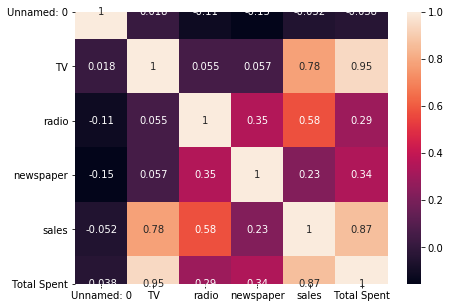

In [74]:
#Checking correlation using Heat Map to get high and low correlated parameteres
plt.figure(figsize=(7,5))
sns.heatmap(df_sales.corr(),annot=True)
plt.show()

We can see that Sales value is highly correlated with TV then with Radio and least with Newspaper

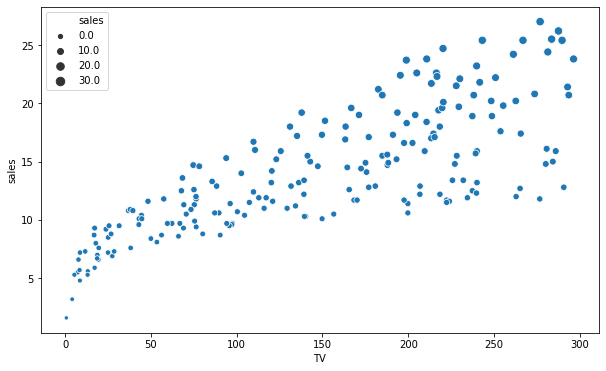

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(y='sales',x='TV',data=df_sales,size='sales')
plt.show()

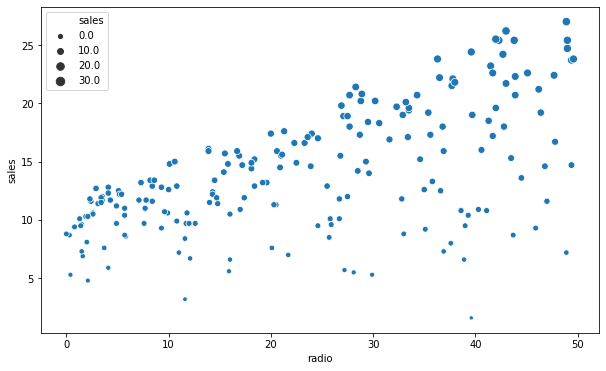

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(y='sales',x='radio',data=df_sales,size='sales')
plt.show()

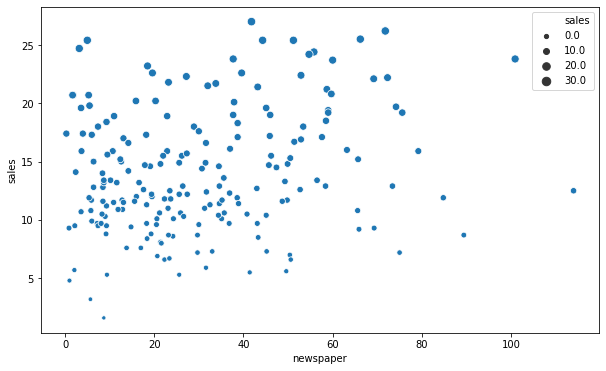

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(y='sales',x='newspaper',data=df_sales,size='sales')
plt.show()

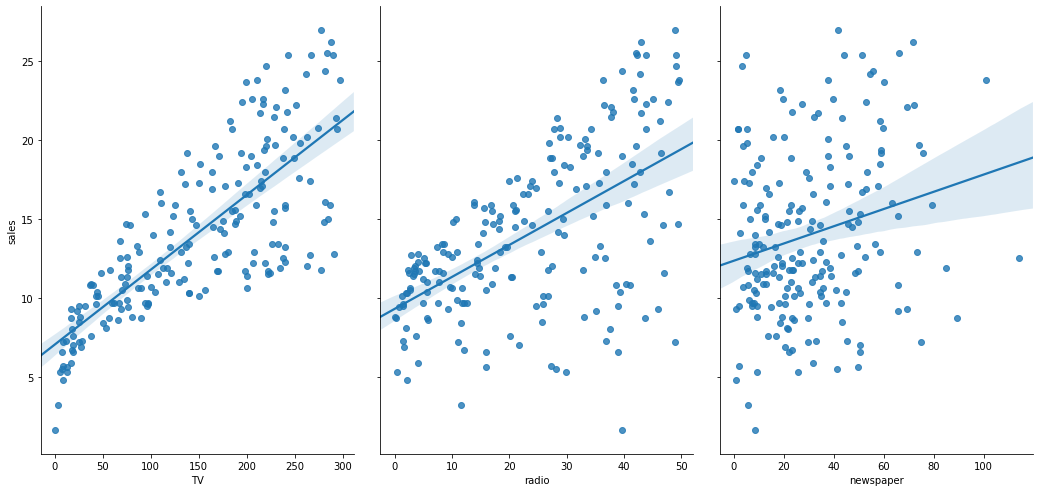

In [37]:
sns.pairplot(x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg',data=df_sales)
plt.show()

We can cleary see that there is strong relation between Advertisement on TV and Radio with sales , and weak relation between 
ads on newspaper and sales   

<Figure size 1440x432 with 0 Axes>

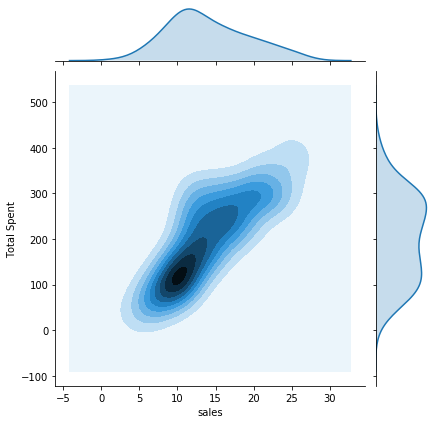

In [98]:
plt.figure(figsize=(20,6))
sns.jointplot(x='sales',y='Total Spent',data=df_sales,kind='kde')
plt.show()

We can say that by utilising the amount spent on advertisement say 60% on TV,30% on Radio and 10% on newpaper 
will give best sales results

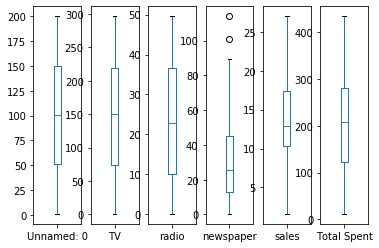

In [99]:
#Checking for outliers using box plot
df_sales.plot(kind='box',subplots=True)
plt.show()

We can see that no outliers are present in the data

** Training our machine to get best prediction model **

In [101]:
#Separating the input and output variables
df_x=df_sales.drop(columns=['sales'])
y=df_sales[['sales']]

In [102]:
#Checking for skewness
df_x.skew()

Unnamed: 0     0.000000
TV            -0.069853
radio          0.094175
newspaper      0.894720
Total Spent    0.049488
dtype: float64

In [106]:
#Removing the positive skewness using log funtcions
df_x['newspaper']=np.log1p(df_x['newspaper'])

In [108]:
#Again Checking for skewness
df_x.skew()

Unnamed: 0     0.000000
TV            -0.069853
radio          0.094175
newspaper     -0.799875
Total Spent    0.049488
dtype: float64

#In this data set we can see that there is linear/continuos data for independable variable hence we use regression method to train and predict the variables

In [109]:
#Importing some neccessary libraries 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [121]:
#Checking for best random state which give best r2 score for various training techniques used to get best prediction
# Defining a function to check for best random state and r2 score.
def maxr2_score(tec,x,y):
    max_r_score=0
    for r_state in range(42,100):
        train_x,test_x,train_y,test_y = train_test_split(df_x,y,random_state = r_state,test_size=0.20)
        tec.fit(train_x,train_y)
        pred = tec.predict(test_x)
        temp=r2_score(test_y,pred)
        if temp>max_r_score:
            max_r_score=temp
            final_r_state=r_state
    print("max r2 score is : ",max_r_score, 'corresponding to random state: ',final_r_state,)

In [111]:
#Importing various methods from libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.svm import SVR

In [122]:
LR=LinearRegression()
maxr2_score(LR,df_x,y)

max r2 score is :  0.9507999053505093 corresponding to random state:  92


In [123]:
DT=DecisionTreeRegressor()
maxr2_score(DT,df_x,y)

max r2 score is :  0.9682886021802125 corresponding to random state:  48


In [124]:
KN=KNeighborsRegressor()
maxr2_score(KN,df_x,y)

max r2 score is :  0.9281193536073292 corresponding to random state:  83


In [125]:
RF=RandomForestRegressor()
maxr2_score(RF,df_x,y)

max r2 score is :  0.9850080736711601 corresponding to random state:  60


We can see that maximum r2 score we are getting from Ensemble Technique Random Forest

In [120]:
#Using Grid search CV for best parameters
RF=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500]}
clf = GridSearchCV(RF, parameters, cv=5)
clf.fit(df_x,y)
clf.best_params_

{'n_estimators': 100}

In [126]:
RF=RandomForestRegressor(n_estimators=100)
maxr2_score(RF,df_x,y)

max r2 score is :  0.986523076250159 corresponding to random state:  83


In [127]:
# Checking cross validation score for Random Forest
from sklearn.model_selection import cross_val_score
cross_score=cross_val_score(RF,df_x,y,cv=5,scoring="r2")
print("Mean r2 score: ",cross_score.mean())
print("standard deviation in r2 score for regressor: ",cross_score.std())
print(cross_score)

Mean r2 score:  0.9668380478451315
standard deviation in r2 score for regressor:  0.00902944308410365
[0.96172072 0.9797904  0.96593518 0.95365443 0.97308951]


In [129]:
#Saving our final model using Random Forest Regression method
train_x,test_x,train_y,test_y = train_test_split(df_x,y,random_state=83,test_size=0.20)
RF.fit(train_x,train_y)
pred=RF.predict(test_x)

In [131]:
#Finding RMSE and Mean absolute error for our final model
print("RMSE is: ",np.sqrt(mean_squared_error(test_y,pred)))
print('Mean Absolute error: ', mean_absolute_error(test_y,pred))

RMSE is:  0.6856218527730872
Mean Absolute error:  0.5287250000000002


In [133]:
#Saving final model using joblib
import warnings
warnings.filterwarnings("ignore")
from sklearn.externals import joblib 
  

joblib.dump(RF, 'RF_sales.pkl')

['RF_sales.pkl']

** This is the best and final model we have saved **